# EDA - Análisis Univariante

En este notebook se analizará cada variable del dataset de forma individual para comprender su distribución, valores característicos y posibles anomalías.

Utilizamos el dataset ya limpio obtenido en el notebook anterior.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/Datos_clean.csv")

df.head()

,provincia,zona,titulo,PrecioActual,PrecioAnterior,metros,habitaciones,ascensor,localizacion,planta,baños,tags,descripcion,Enlace,precio_m2
0,madrid,ciudad-lineal,"Piso en calle de San Marcelo, 22, Ventas, Madrid",355000,0,69,2.0,S,EXTERIOR,5ª,1,"VIVIENDA,LUMINOSO,VISTAS,REFORMADA,PORTERO,EXT...",Particular Vende vivienda totalmente reformada...,https://www.idealista.com/inmueble/106956987/,5144.93
1,madrid,carabanchel,"Piso en calle Cabo Nicolás Mur, San Isidro, Ma...",149000,159000,91,3.0,N,EXTERIOR,1ª,0,"PISO,EXCLUSIVA,INMOBILIARIA,OPORTUNIDAD",Inmobiliarias Encuentro vende en exclusiva la ...,https://www.idealista.com/inmueble/106906044/,1637.36
2,madrid,centro,"Piso en calle de Rodas, Lavapiés-Embajadores, ...",195000,0,36,1.0,S,NaN,2ª,0,"EXCLUSIVA,ESTUDIO",ESTUDIO EN PLENO CENTRO DE MADRIDSarago Servic...,https://www.idealista.com/inmueble/107306175/,5416.67
3,madrid,usera,"Piso en calle de Ferroviarios, Almendrales, Ma...",195000,0,58,1.0,S,INTERIOR,BAJO,0,"VIVIENDA,HOGAR,FUNCIONAL","Esta acogedora vivienda, ubicada en una planta...",https://www.idealista.com/inmueble/106325171/,3362.07
4,madrid,tetuan,"Dúplex en Bellas Vistas, Madrid",715000,750000,140,3.0,S,EXTERIOR,2ª,0,"TERRAZA,EXCLUSIVA,MODERNO","Maravilloso ATICO de reciente construcción, co...",https://www.idealista.com/inmueble/106627265/,5107.14


## 1. Análisis de variables numéricas

Se evaluarán distribuciones y estadísticas de:
- PrecioActual
- precio_m2
- metros
- habitaciones
- baños

In [2]:
df[["PrecioActual", "precio_m2", "metros", "habitaciones", "baños"]].describe()

,PrecioActual,precio_m2,metros,habitaciones,baños
count,1.182600e+04,11826.000000,11826.000000,11460.000000,11826.000000
mean,1.030501e+06,6654.731323,153.790039,2.847731,0.394047
std,1.237718e+06,3581.971575,766.217750,1.432402,0.882134
min,1.200000e+04,2.560000,11.000000,1.000000,0.000000
25%,2.890000e+05,3909.090000,68.000000,2.000000,0.000000
50%,6.200000e+05,6000.000000,103.000000,3.000000,0.000000
75%,1.329000e+06,8725.490000,160.000000,3.000000,0.000000
max,2.300000e+07,33644.860000,75000.000000,20.000000,7.000000


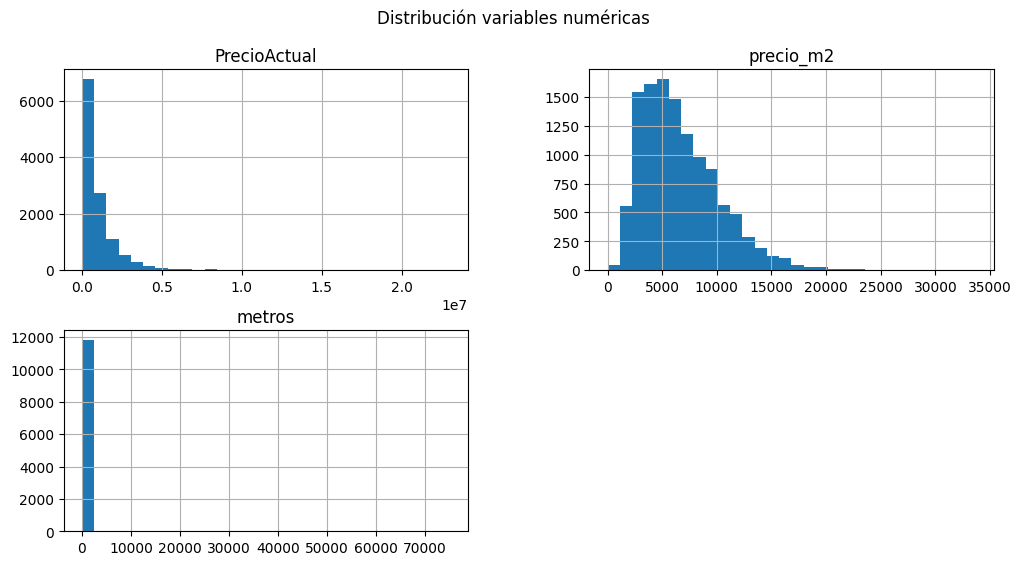

In [3]:
df[["PrecioActual", "precio_m2", "metros"]].hist(bins=30, figsize=(12,6))
plt.suptitle("Distribución variables numéricas")
plt.show()

### Conclusiones del análisis univariante (variables numéricas)

- El precio de las viviendas muestra una fuerte asimetría, con muchos pisos en rangos bajos y pocos extremadamente caros (outliers).
- El precio por metro cuadrado presenta una distribución más concentrada entre 3.000€ y 8.000€/m2.
- Existen valores extremos en `metros`, como inmuebles muy grandes (>10.000 m2), que podrían corresponder a edificios completos o datos erróneos. Estos outliers deberán ser analizados más adelante.
- La mediana de habitaciones está en 3, lo que indica que la mayoría de viviendas son de tamaño familiar estándar.


## 2. Análisis de variables categóricas

Ejemplos:
- Zona
- Localización
- Ascensor

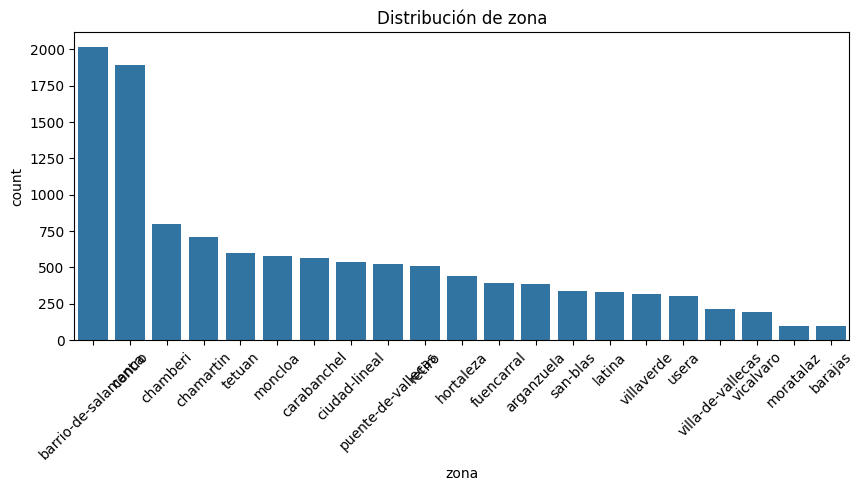

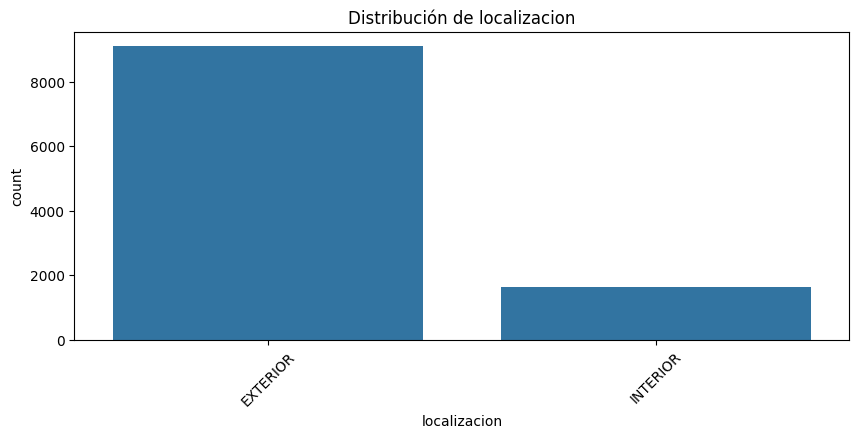

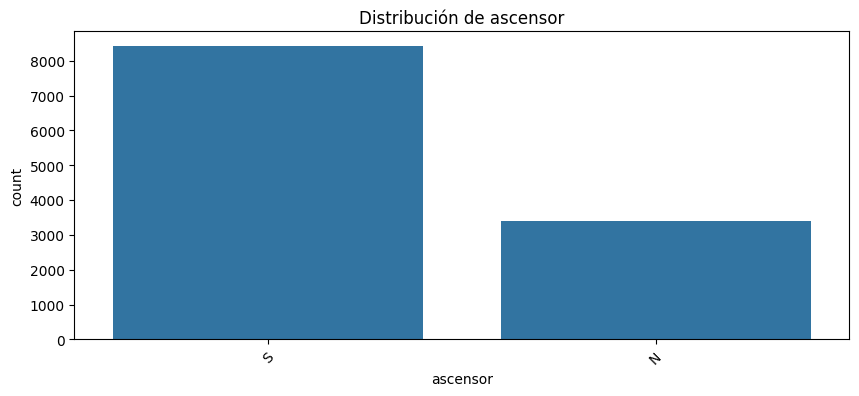

In [4]:
cat_vars = ["zona", "localizacion", "ascensor"]
for var in cat_vars:
    plt.figure(figsize=(10,4))
    sns.countplot(data=df, x=var, order=df[var].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f"Distribución de {var}")
    plt.show()

### Conclusiones del análisis univariante (variables categóricas)

- **Zona**: La mayor concentración de anuncios se encuentra en los barrios de **Salamanca**, **Chamartín** y **Chamberí**, zonas de alto poder adquisitivo. Esto puede sesgar el dataset hacia precios elevados.
- **Localización**: La mayoría de viviendas son **exteriores**, lo cual es un factor positivo que suele incrementar el precio.
- **Ascensor**: La presencia de ascensor es mayoritaria, pero todavía existe una parte relevante de viviendas sin ascensor, lo cual puede afectar al precio de pisos en plantas altas.

Estas observaciones sugieren que **ubicación** y **características del edificio** podrían tener un impacto significativo en el precio de la vivienda, lo que será analizado en la siguiente fase del proyecto.